In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult 3.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.shape

(48842, 15)

In [5]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
data.duplicated().sum()

52

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
data['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [11]:
data['workclass'].replace({'?':'NotListed'},inplace=True)

C:\Users\smrut\AppData\Local\Temp\ipykernel_23792\3191512893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?':'NotListed'},inplace=True)


In [12]:
data= data[~data['workclass'].isin(['Never-worked', 'Without-pay'])]

In [13]:
data['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
NotListed            2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Name: count, dtype: int64

In [14]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22352
Never-married            16069
Divorced                  6629
Separated                 1530
Widowed                   1517
Married-spouse-absent      625
Married-AF-spouse           37
Name: count, dtype: int64

In [15]:
data = data[data['marital-status'] != 'Married-AF-spouse']

In [16]:
data['occupation'].value_counts()

occupation
Prof-specialty       6161
Craft-repair         6097
Exec-managerial      6078
Adm-clerical         5597
Sales                5495
Other-service        4912
Machine-op-inspct    3014
?                    2790
Transport-moving     2353
Handlers-cleaners    2068
Farming-fishing      1476
Tech-support         1445
Protective-serv       981
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [17]:
data['occupation'] = data['occupation'].replace({'?':'NotListed'})

In [18]:
data['relationship'].value_counts()

relationship
Husband           19683
Not-in-family     12556
Own-child          7553
Unmarried          5122
Wife               2304
Other-relative     1504
Name: count, dtype: int64

In [19]:
data['race'].value_counts()

race
White                 41655
Black                  4676
Asian-Pac-Islander     1515
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [20]:
data['gender'].value_counts()

gender
Male      32581
Female    16141
Name: count, dtype: int64

In [21]:
data['native-country'].value_counts()

native-country
United-States                 43726
Mexico                          943
?                               856
Philippines                     292
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [22]:
data['native-country'].replace({'?':'Other'},inplace=True)

C:\Users\smrut\AppData\Local\Temp\ipykernel_23792\1706155349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].replace({'?':'Other'},inplace=True)


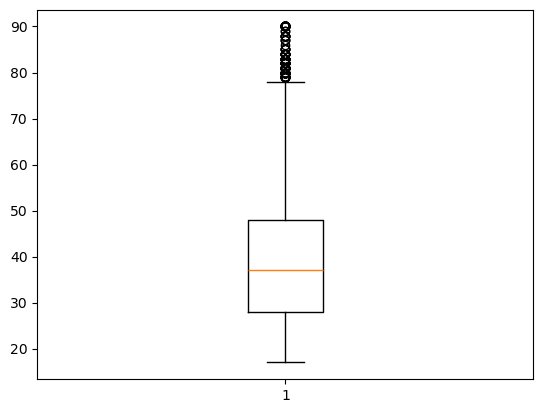

In [23]:
plt.boxplot(data['age'])
plt.show()

In [24]:
data = data[(data['age']<=75) & (data['age']>=17)]

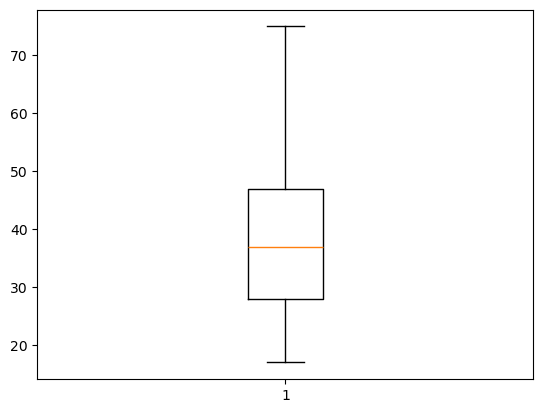

In [25]:
plt.boxplot(data['age'])
plt.show()

In [26]:
data.drop(['fnlwgt'], axis=1, inplace=True)

In [27]:
data.head(2)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [28]:
data['education'].value_counts()

education
HS-grad         15626
Some-college    10801
Bachelors        7965
Masters          2633
Assoc-voc        2050
11th             1801
Assoc-acdm       1590
10th             1372
7th-8th           898
Prof-school       818
9th               745
12th              652
Doctorate         586
5th-6th           496
1st-4th           237
Preschool          80
Name: count, dtype: int64

In [29]:
data=data[data['education'] != '5th-6th']
data=data[data['education'] != '1st-4th']
data=data[data['education'] != 'Preschool']

In [30]:
data['education'].value_counts()

education
HS-grad         15626
Some-college    10801
Bachelors        7965
Masters          2633
Assoc-voc        2050
11th             1801
Assoc-acdm       1590
10th             1372
7th-8th           898
Prof-school       818
9th               745
12th              652
Doctorate         586
Name: count, dtype: int64

In [31]:
def simplify_marital_status(x):
    if x in ['Married-civ-spouse', 'Married-spouse-absent']:
        return 'Married'
    elif x in ['Divorced', 'Separated', 'Widowed']:
        return 'Previously-married'
    elif x == 'Never-married':
        return 'Never-married'
    else:
        return x

data['marital-status'] = data['marital-status'].apply(simplify_marital_status)

In [32]:
data['marital-status'].value_counts()

marital-status
Married               22322
Never-married         15822
Previously-married     9393
Name: count, dtype: int64

In [33]:
def group_country(x):
    if x == 'United-States':
        return 'US'
    elif x in [
        'Mexico', 'Puerto-Rico', 'El-Salvador', 'Honduras', 'Guatemala',
        'Nicaragua', 'Ecuador', 'Columbia', 'Trinadad&Tobago', 'Jamaica',
        'Dominican-Republic', 'Haiti', 'Peru'
    ]:
        return 'Latin-America'
    elif x in [
        'India', 'China', 'Japan', 'Philippines', 'Vietnam', 'Thailand',
        'Taiwan', 'Cambodia', 'Hong', 'Laos', 'South'
    ]:
        return 'Asia'
    elif x in [
        'Germany', 'England', 'France', 'Ireland', 'Italy', 'Poland',
        'Portugal', 'Greece', 'Scotland', 'Hungary', 'Yugoslavia',
        'Holand-Netherlands'
    ]:
        return 'Europe'
    elif x == 'Canada':
        return 'North-America'
    elif x == 'Outlying-US(Guam-USVI-etc)':
        return 'US-Territory'
    else:
        return 'Other'

In [34]:
data['country_group'] = data['native-country'].apply(group_country)

In [35]:
data['country_group'].value_counts()

country_group
US               43159
Latin-America     1447
Other             1005
Asia               989
Europe             737
North-America      177
US-Territory        23
Name: count, dtype: int64

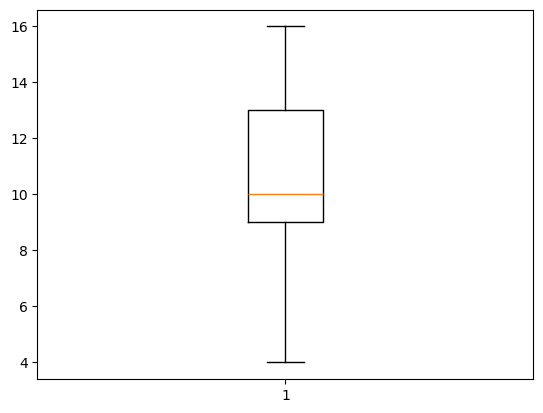

In [36]:
plt.boxplot(data['educational-num'])
plt.show()

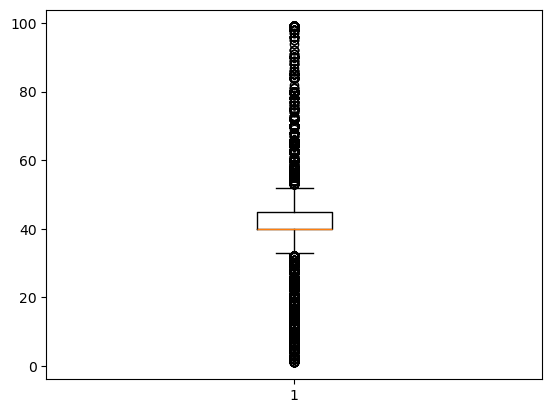

In [37]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [38]:
data.drop('native-country', axis=1, inplace=True)

In [39]:
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income,country_group
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K,US
1,38,Private,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,<=50K,US
2,28,Local-gov,Assoc-acdm,12,Married,Protective-serv,Husband,White,Male,0,0,40,>50K,US
3,44,Private,Some-college,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K,US
4,18,NotListed,Some-college,10,Never-married,NotListed,Own-child,White,Female,0,0,30,<=50K,US


In [40]:
data['capital-gain'].value_counts()

capital-gain
0        43595
15024      513
7688       408
7298       360
99999      240
         ...  
1111         1
7262         1
6612         1
1264         1
2387         1
Name: count, Length: 122, dtype: int64

In [41]:
data['capital-loss'].value_counts()

capital-loss
0       45299
1902      303
1977      253
1887      231
2415       72
        ...  
1539        1
1870        1
1911        1
1944        1
4356        1
Name: count, Length: 99, dtype: int64

In [42]:
data["has_capital_gain"] = (data["capital-gain"] > 0).astype(int)
data["has_capital_loss"] = (data["capital-loss"] > 0).astype(int)

In [43]:
data["income_encoded"] = data["income"].apply(lambda x: 1 if ">50K" in x else 0)

In [44]:
data.dtypes

age                  int64
workclass           object
education           object
educational-num      int64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
income              object
country_group       object
has_capital_gain     int32
has_capital_loss     int32
income_encoded       int64
dtype: object

In [45]:
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income,country_group,has_capital_gain,has_capital_loss,income_encoded
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K,US,0,0,0
1,38,Private,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,<=50K,US,0,0,0
2,28,Local-gov,Assoc-acdm,12,Married,Protective-serv,Husband,White,Male,0,0,40,>50K,US,0,0,1
3,44,Private,Some-college,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K,US,1,0,1
4,18,NotListed,Some-college,10,Never-married,NotListed,Own-child,White,Female,0,0,30,<=50K,US,0,0,0


In [46]:
data.drop(['capital-gain','capital-loss','income','educational-num'], axis=1, inplace=True)

In [47]:
data = data.rename(columns={
    'hours-per-week': 'hours_per_week',
    'marital-status': 'marital_status'
})


In [48]:
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,country_group,has_capital_gain,has_capital_loss,income_encoded
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,US,0,0,0
1,38,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,50,US,0,0,0
2,28,Local-gov,Assoc-acdm,Married,Protective-serv,Husband,White,Male,40,US,0,0,1
3,44,Private,Some-college,Married,Machine-op-inspct,Husband,Black,Male,40,US,1,0,1
4,18,NotListed,Some-college,Never-married,NotListed,Own-child,White,Female,30,US,0,0,0


In [49]:
x=data.drop(columns=['income_encoded']) #input
y=data['income_encoded'] #output
x

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,country_group,has_capital_gain,has_capital_loss
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,US,0,0
1,38,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,50,US,0,0
2,28,Local-gov,Assoc-acdm,Married,Protective-serv,Husband,White,Male,40,US,0,0
3,44,Private,Some-college,Married,Machine-op-inspct,Husband,Black,Male,40,US,1,0
4,18,NotListed,Some-college,Never-married,NotListed,Own-child,White,Female,30,US,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married,Tech-support,Wife,White,Female,38,US,0,0
48838,40,Private,HS-grad,Married,Machine-op-inspct,Husband,White,Male,40,US,0,0
48839,58,Private,HS-grad,Previously-married,Adm-clerical,Unmarried,White,Female,40,US,0,0
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,US,0,0


In [50]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income_encoded, Length: 47537, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
X_train

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,country_group,has_capital_gain,has_capital_loss
16857,18,NotListed,12th,Never-married,NotListed,Own-child,White,Male,25,US,0,0
20379,19,Private,11th,Never-married,Handlers-cleaners,Own-child,White,Male,40,US,0,0
5120,33,Private,10th,Married,Other-service,Husband,White,Male,80,Latin-America,0,0
6302,32,Private,Assoc-acdm,Married,Farming-fishing,Husband,White,Male,40,US,0,0
48583,45,Local-gov,HS-grad,Married,Protective-serv,Husband,White,Male,40,US,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11606,34,Private,Some-college,Never-married,Tech-support,Not-in-family,Black,Female,50,US,0,0
45963,38,Private,Bachelors,Previously-married,Other-service,Not-in-family,Black,Female,60,Other,0,0
39206,51,Private,Assoc-acdm,Married,Exec-managerial,Husband,White,Male,45,US,0,0
881,31,Private,Bachelors,Never-married,Tech-support,Not-in-family,White,Female,40,US,0,0


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
# Define your columns
categorical_cols = ['education', 'workclass', 'marital_status', 'occupation', 
                    'relationship', 'race', 'gender', 'country_group']
numeric_cols = ['age', 'hours_per_week', 'has_capital_gain', 'has_capital_loss']

# Build the preprocessor
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost" : XGBClassifier (eval_metric='logloss')
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('step1',step1),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
# Pick the best model name based on highest accuracy
best_model_name = max(results, key=results.get)
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Rebuild and retrain the pipeline with the best model
best_model = models[best_model_name]
best_pipe = Pipeline([
    ('step1', step1),
    ('model', best_model)
])
best_pipe.fit(X_train, y_train)

# Save the best model pipeline using pickle
import pickle
pickle.dump(best_pipe, open('best_model_pipe.pkl', 'wb'))
print("📦 Model pipeline saved as 'best_model_pipe.pkl'")


LogisticRegression Accuracy: 0.8474
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7202
           1       0.73      0.59      0.65      2306

    accuracy                           0.85      9508
   macro avg       0.80      0.76      0.78      9508
weighted avg       0.84      0.85      0.84      9508

RandomForest Accuracy: 0.8254
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7202
           1       0.66      0.58      0.62      2306

    accuracy                           0.83      9508
   macro avg       0.76      0.74      0.75      9508
weighted avg       0.82      0.83      0.82      9508

KNN Accuracy: 0.8300
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7202
           1       0.66      0.63      0.64      2306

    accuracy                           0.83      9508
   macro avg       0.77      0.76      0.

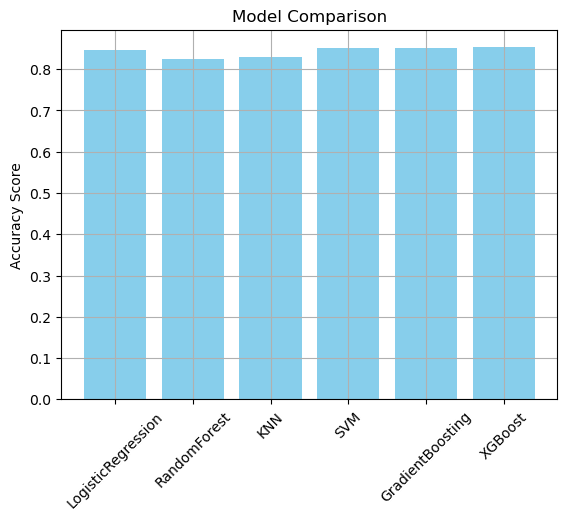

In [65]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [73]:
import pickle
pickle.dump(data,open('df.pkl','wb'))

In [72]:
data

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,country_group,has_capital_gain,has_capital_loss,income_encoded
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,US,0,0,0
1,38,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,50,US,0,0,0
2,28,Local-gov,Assoc-acdm,Married,Protective-serv,Husband,White,Male,40,US,0,0,1
3,44,Private,Some-college,Married,Machine-op-inspct,Husband,Black,Male,40,US,1,0,1
4,18,NotListed,Some-college,Never-married,NotListed,Own-child,White,Female,30,US,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married,Tech-support,Wife,White,Female,38,US,0,0,0
48838,40,Private,HS-grad,Married,Machine-op-inspct,Husband,White,Male,40,US,0,0,1
48839,58,Private,HS-grad,Previously-married,Adm-clerical,Unmarried,White,Female,40,US,0,0,0
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,US,0,0,0
